# An initial look at data from a single generator combined with wind records


In [5]:
library(sqldf)
library(scales)

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



            timestamp         mean            yield      
 2019-01-13 02:00:   1   Min.   :0.0000   Min.   :0.000  
 2019-01-13 03:00:   1   1st Qu.:0.2835   1st Qu.:0.253  
 2019-01-13 04:00:   1   Median :1.6230   Median :1.594  
 2019-01-13 05:00:   1   Mean   :1.9855   Mean   :1.980  
 2019-01-13 06:00:   1   3rd Qu.:3.7905   3rd Qu.:3.822  
 2019-01-13 07:00:   1   Max.   :4.9060   Max.   :4.921  
 (Other)         :2109                                   

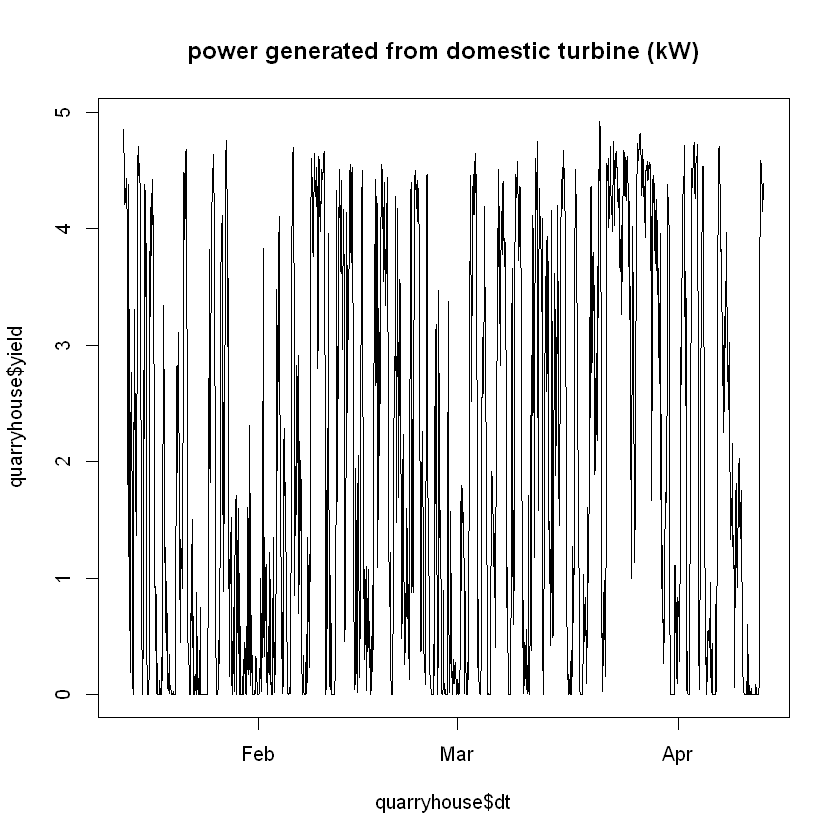

In [2]:
quarryhouse <- read.csv("./database/quarryhouse.csv", header=TRUE, sep=",", dec=".")
summary(quarryhouse)
quarryhouse$dt <- as.POSIXct(quarryhouse$timestamp,format="%Y-%m-%d %H:%M",tz="GMT") ## all dates stored as GMT
plot(quarryhouse$dt, quarryhouse$yield, main="power generated from domestic turbine (kW)", type="l")


               timestamp     temperature        humidity         dewpoint     
 2019-02-08 09:00:00:   2   Min.   :-1.400   Min.   : 44.60   Min.   :-4.600  
 2019-02-08 10:00:00:   2   1st Qu.: 5.000   1st Qu.: 78.10   1st Qu.: 2.100  
 2019-02-08 11:00:00:   2   Median : 6.400   Median : 86.70   Median : 4.000  
 2019-02-08 12:00:00:   2   Mean   : 6.385   Mean   : 84.42   Mean   : 3.879  
 2019-02-08 13:00:00:   2   3rd Qu.: 7.900   3rd Qu.: 92.00   3rd Qu.: 5.900  
 2019-02-08 14:00:00:   2   Max.   :12.400   Max.   :100.00   Max.   : 9.700  
 (Other)            :1549                                                     
    wind_dir     wind_speed       pressure    Pt        visibility   
 S      :296   Min.   : 0.00   Min.   : 961   F:746   Min.   :  400  
 W      :239   1st Qu.:10.00   1st Qu.: 997   R:791   1st Qu.:13000  
 WSW    :172   Median :16.00   Median :1012   S: 24   Median :20000  
 SSW    :131   Mean   :16.36   Mean   :1008           Mean   :22651  
 SSE    :113   3rd

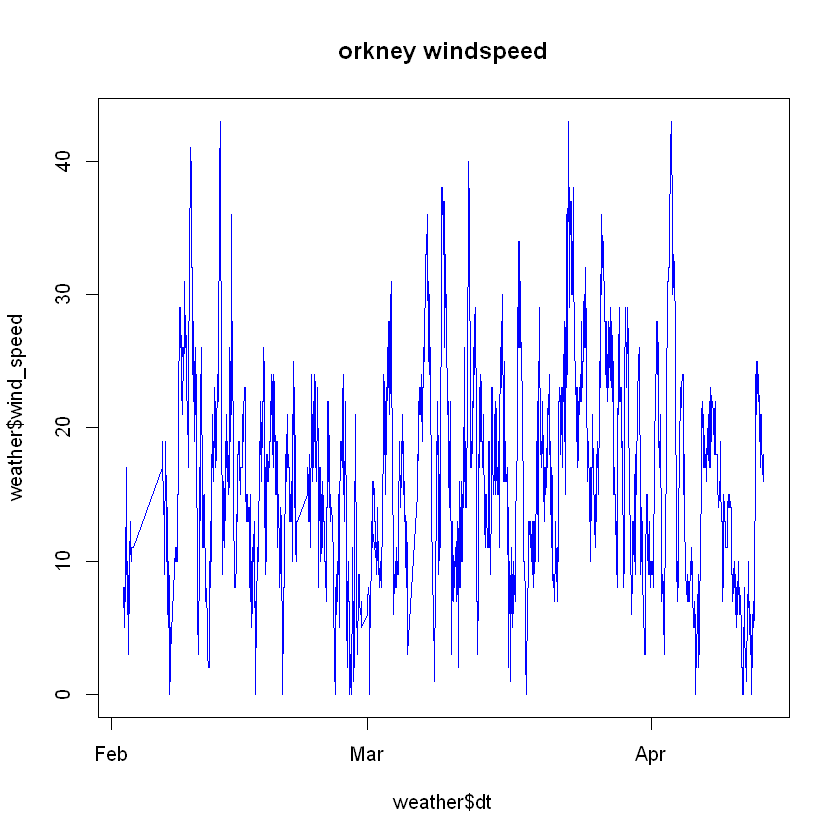

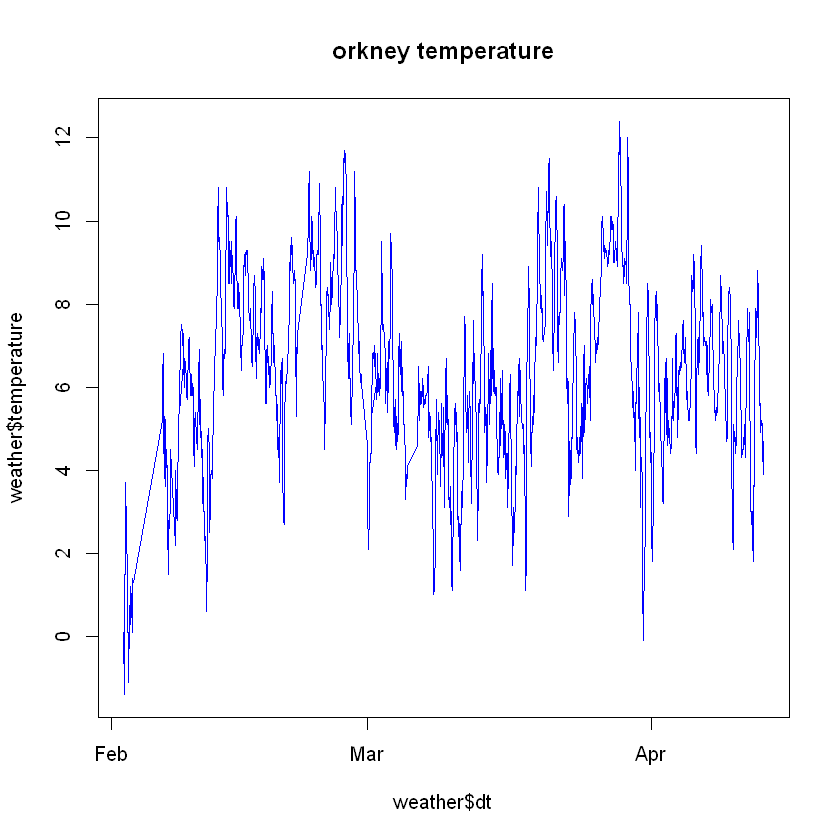

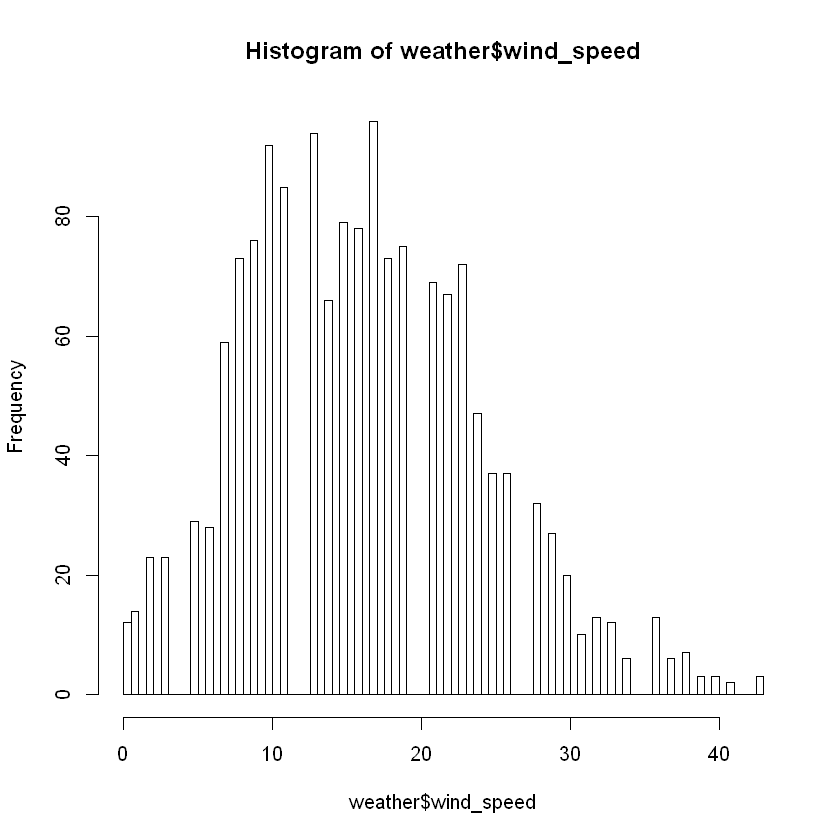

In [3]:

weather <- read.csv("./database/orkneyweatherlog.csv", header = TRUE, sep=",", dec =".")
weather$dt <- as.POSIXct(weather$timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT")
summary(weather)
plot(weather$dt, weather$wind_speed, main="orkney windspeed", type = "l", col ="blue")
plot(weather$dt, weather$temperature, main="orkney temperature", type = "l", col ="blue")
hist(weather$wind_speed, 100)

In [ ]:
qcombined <- merge(quarryhouse, weather, by.x = "dt", by.y="dt")

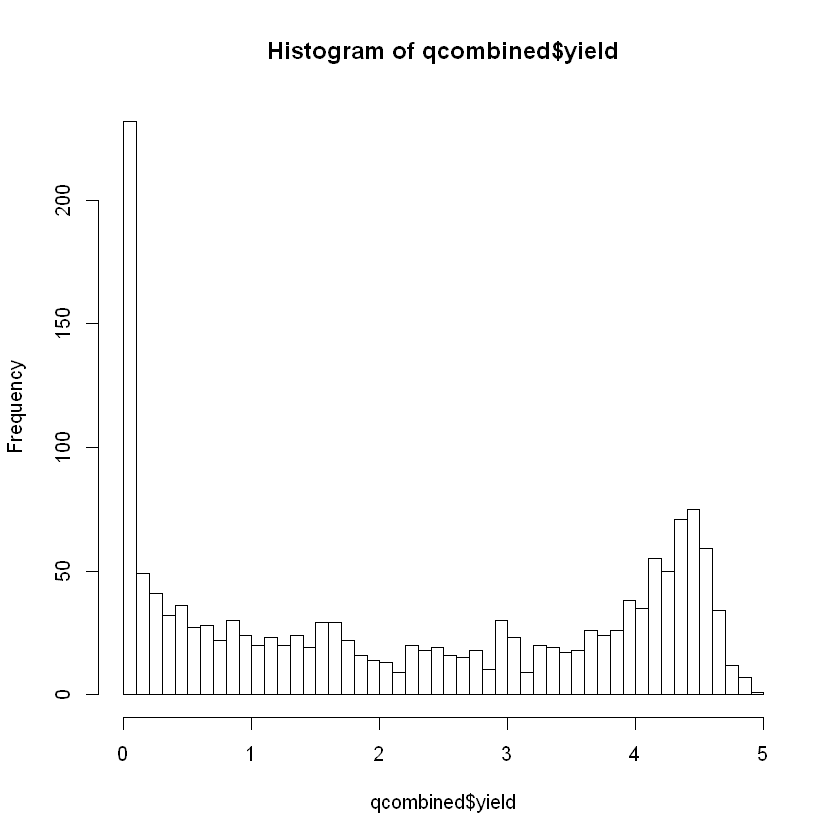

In [15]:
hist(qcombined$yield, 50)

       dt                                timestamp.x        mean       
 Min.   :2019-02-02 08:00:00   2019-02-08 09:00:   2   Min.   :0.0000  
 1st Qu.:2019-02-22 11:45:00   2019-02-08 10:00:   2   1st Qu.:0.4705  
 Median :2019-03-11 15:30:00   2019-02-08 11:00:   2   Median :2.2180  
 Mean   :2019-03-10 23:15:02   2019-02-08 12:00:   2   Mean   :2.2510  
 3rd Qu.:2019-03-27 20:15:00   2019-02-08 13:00:   2   3rd Qu.:4.0550  
 Max.   :2019-04-13 00:00:00   2019-02-08 14:00:   2   Max.   :4.9060  
                               (Other)         :1512                   
     yield                     timestamp.y    temperature        humidity     
 Min.   :0.0000   2019-02-08 09:00:00:   2   Min.   :-1.400   Min.   : 44.60  
 1st Qu.:0.4805   2019-02-08 10:00:00:   2   1st Qu.: 5.100   1st Qu.: 78.20  
 Median :2.2060   2019-02-08 11:00:00:   2   Median : 6.400   Median : 86.70  
 Mean   :2.2486   2019-02-08 12:00:00:   2   Mean   : 6.407   Mean   : 84.42  
 3rd Qu.:4.0415   2019-02-08 

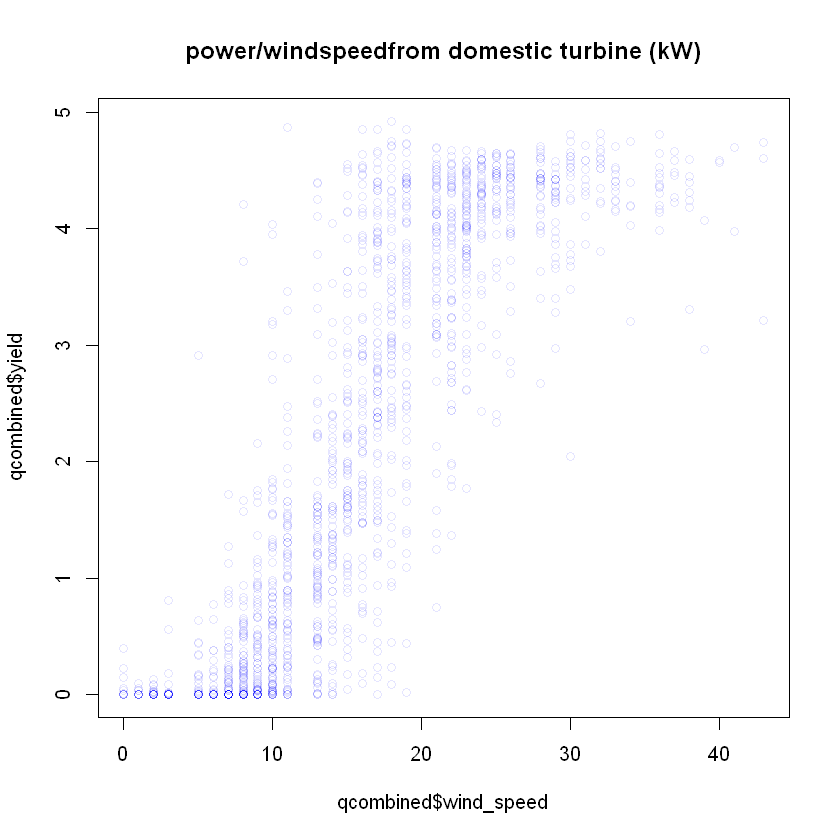

In [6]:

plot(qcombined$wind_speed, qcombined$yield, main="power/windspeedfrom domestic turbine (kW)", col=alpha(c("blue"), 0.1), pch=1)
summary (qcombined)


E ENE ESE   N  NE NNE NNW  NW   S  SE SSE SSW  SW   W WNW WSW 
 60 103  25  47  50  27  34  42 286  44 108 128 106 236  61 167

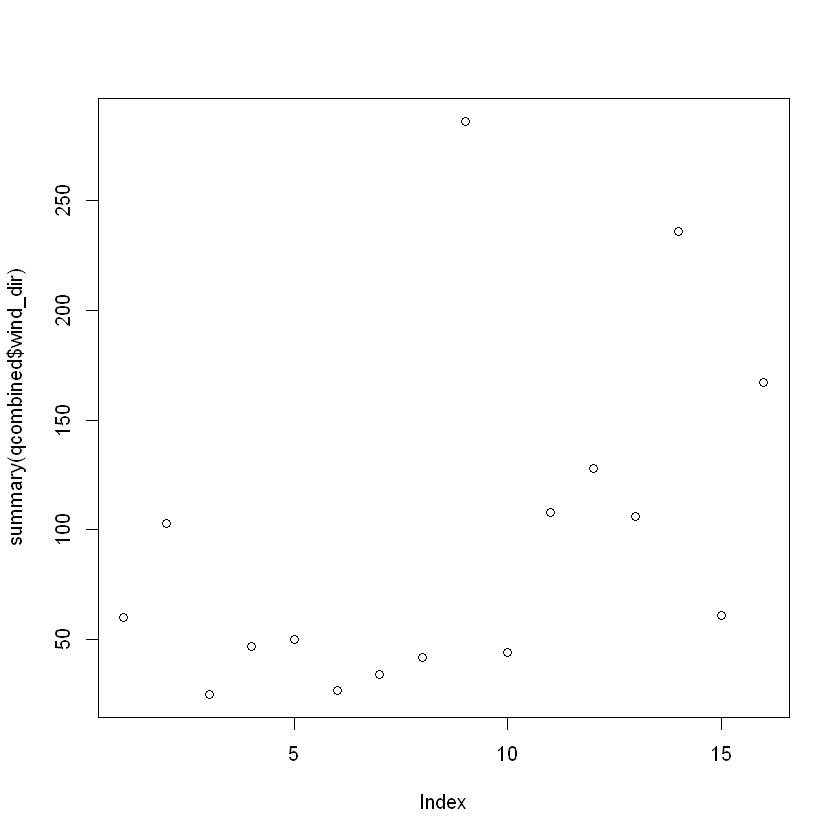

In [19]:
summary(qcombined$wind_dir)
plot(summary(qcombined$wind_dir))

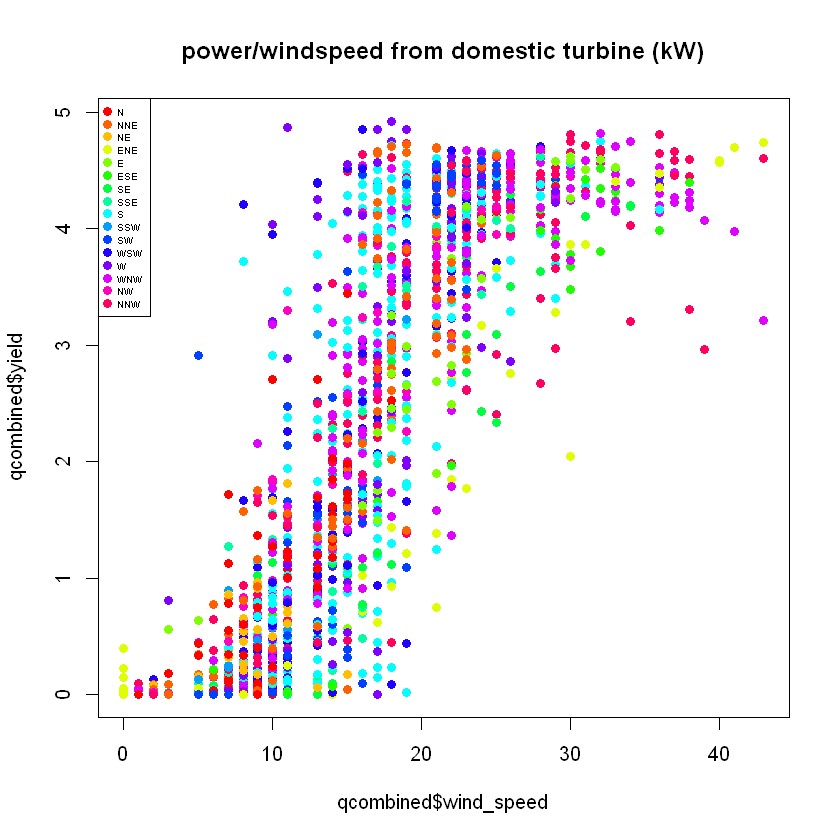

In [7]:
library("colorspace")
directions <- c("N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW")
colours <- c(rainbow_hcl(16))
colours <- rainbow(16)
dircolour <- setNames(as.list(colours), directions)
#colours <-c(factor(qcombined$wind_dir, labels=rainbow_hcl(16)))
plot(qcombined$wind_speed, qcombined$yield, main="power/windspeed from domestic turbine (kW)", col=as.character(dircolour[qcombined$wind_dir]), pch=16)
legend("topleft", pch=16, col=rainbow(16), legend=directions, pt.cex=1, cex=0.5)

In [ ]:
combined$dtTime <- as.numeric(combined$dt - trunc(combined$dt, "days"))
class(combined$dtTime) <- "POSIXct"
low_wind <- combined[combined$wind_speed <= 8,]
plot(low_wind$dtTime, low_wind$demand, main="daily demand", col=alpha(c("blue"), 0.1), pch=1)
plot(low_wind$dt, low_wind$demand, main="daily demand", col=alpha(c("blue"), 0.1), pch=1)

high_wind <- combined[combined$wind_speed >= 8,]
plot(high_wind$dtTime, high_wind$demand, main="daily demand", col=alpha(c("blue"), 0.1), pch=1)